# Discovery and Representation of Open Making Related Terms

Bulent Ozel, UZH

```bulent.ozel@gmail.com```

It should noted that the primary focus of the text processing in this process is to be able to collect, clean, tokenize and prune an input text around **one or very few specific theme(s) or topic(s)**.

In cases when there are multiple themes with statsitically large and sufficient set of documents then standard topic modelling techniques such as NMF, LDA, LSI are suggested for the task. Those standarized approaches are based on matrix decomposition techniques and can be employed to capture and measure the specificity of terms around the topics.

Nevertheless, the normalized term frequencies and as well as the specificity scores associated to them with respect to a reference background corpus, can be used as input to other matrix decomposition techniques when multiple themes grouped together terms' specificity at being able to diffenntiate these themes from each other is the concern.


## 1. Objective

This notebook sketches the initial exercise on identifiying a weighted set of key terms using a specific corpus.

The method outlined here aims to set-up a base line for future improvements. See the relevant sections below.
 * It uses a statistical approach combined with standardized procedures that are widely applied in standard NLP workflows.
 * In this base line, it aims to present a work flow that can be ablied to
     * different languages
     * differrent problem domains
 * It relies on a domain specific corpus as a foreground corpus and a reference corpus as the background corpus
 * In this work flow specific corpus is formed via supervised crawling on the wikipedia
 * In the exercises below the NLTK's Brown corpus is used as the reference background corpus. However, in the next work round, we aim to use full Wikipedia corpus under the same language of the specific corpus or a reprsentative random sample of it. 
 * The normalized comparison of candidate keywords within specific vs reference corpus is used as a proxy indication of the relevance of the candidate keyword for the given topic that is reprseneted by the collection of articles under the specific corpus.

## 2. Overall Work Flow
In short, the workflow presented on this notebook is the second stage on a workflow objective of which is being able to measure relevance of a given external input to a specific theme, issue or topic. The steps of the work flow is as follows.

1. Forming a specific corpus where the corpus consists of set of documents around a topic. The corpus could be
    - a set of blog articles around an issue let say green finance
    - or a set of Wikipedia articles around the same subject
    - or collection of news articles around the green finance
    - or collection of tweets around the same issue.
    
    At the moment we have another module that given a set of seed Wikipedia articles around an issue the crawler scrapes textual data from articles. For the details of the module please [see the scraper module.](https://github.com/bulentozel/OpenMaker/tree/master/Scraping). The output of that module is a set of input texts stored in a collection in JSON format. 

2. Given an input set of texts on a theme a concept or a topic identify set of terms that more likely or less likely can occur within a discussion on the topic. This module hereby presents one of the simple methods for this purpose.

3. Given a list of weighted terms which are more likely to occur or reprsent a theme, concept or topic and input query text measure the relevance of the input text to the topic/theme/concept. [The notebook in this link](https://github.com/bulentozel/OpenMaker/blob/master/Semantics/Score%20Text.ipynb) demonstrates one way doing such scoring of a given text against the curated set of terms of this particular module.




## 3. Work-flow Process in this Particular Module
1. Loading the reference corpus and a topic specific corpus
2. Tokenizing and cleaning the reference corpus and the specific corpus
3. Calculating term frequency counts of the reference corpus and the specific corpus
4. Identifying common terms in both corpuses
5. Identifying distinctive terms that occur in the specific corpus but not in reference corpus, if any
6. Reducing the terms in the dinstinctive set by an iterative manual inspection process as well as by  using a curated list of distinctive terms on the topic.
7. Computing likelihood ratio (empirical probabilities) of the terms that are observed in the specific topic
8. Tabulating identified list of terms, their raw frequencies and weights.

## 4. Suggested Future Work

* Using language specicif term frequency counts of Wikipedia itself for comparisons. In NLP terminology, the *foreground* corpus around a topic needs to be compared and contrasted to a *background* corpus.

* Improving the semantic crawler of the previous stage to be able to increase quality of the specific corpuses

* Adding new scoring types that measures relevance of a given term to a given topic.

### Methodological Improvements
* Instead of tokenizing all terms, examine possibilities of key-phrase extrcation combining with *tf-idf* and 
    - experiment with extracting noun phrases and words, for this use NLTK's regular expression module for POS (part of speeach) analysis.
    - extract n-grams where n=1,2,3

## 5. Definitions and Assumptions

### Assumptions
* In the current state of the task it is assumed that a document's terms tend to be relatively frequent within the document as compared to an external reference corpus. However, it should be noted this assumption is contested in the field. See the paper by Chuang et el.

* Condidering the fact that the crawler is used to aggregate semantically related set of documents into a single document, *tf x idf* is equivalent to *tf*. As can be seen below, we use a normalized version of *tf*: *ntS / NS*.

* Fewer number of but relatively more relevant training (input corpus) is prefered in order to reduce term extraction problems due to length of documents. However, it should be noted that the crawling depth of an identiefied wiki article from stage 1 of this document can be used as an additional weight on relevance/reprsesntation of keywords.

* We have limited ourselves to terms instead of n-grams and phrases or use of POS to be able to develop a base model that can work on different languages.
 
 
### Term
Given for instance a set of texts around open source software movement a term that is identified can be a word such as *openness*, a person such as *Stallman* a license type such as *GNU*, an acronym for an organization such as *FSF* the Free Software Foundation, or a technology such as *Emacs*.

### Likelihood ratio
It is a simple measure computed comparing frequency count of a term in a specific corpus versus its frequency count in the reference reference corpus. Here assumption is that the reference corpus is a large enough sample of the language at observing the occurance of a term. Then having a higher/lower observation frequency of a term in the specific corpus is a proxy indicator for the term choice while having a debate on the topic.

The likelihood ratio for a term P_t is calculated as:

P_t = log ( (ntS/NS) / (ntR/NR) )

where

- *ntS* is the raw frequency count of the term in the entire specific corpus
- *ntR* is the raw frequenccy count of the term in the reference corpus
- *NS* is the total number of terms in the specific corpus
- *NR* is the total number of terms in the reference corpus

It should be noted that frequency counts are calculated after having applied the same tokenization and post processing such as excluding stop-words, pancuations, rare terms, etc both on the reference corpus and the specific corpus.

## 6. State of the art 

* Survey Paper: Kazi Saidul Hasan and Vincent Ng, 2014. “Automatic Keyphrase Extraction: A Survey of the State of the Art” Proceedings of the 52nd Annual Meeting of the Association for Computational Linguistics, pages 1262–1273.

* Survey Paper: Sifatullah Siddiqi and Aditi Sharan. Article: Keyword and Keyphrase Extraction Techniques: A Literature Review. International Journal of Computer Applications 109(2):18-23, January 2015

* Survey Paper: Z. A. Merrouni, B. Frikh, and B. Ouhbi. Automatic keyphrase extraction: An overview of the state of the art. In 2016 4th IEEE
Colloquium on Information Science and Technology
(CiSt), pages 306–313, Oct 2016

* PageRank - Topical: Zhiyuan Liu, Wenyi Huang, Yabin Zheng and Maosong Sun, 2010. “Automatic Keyphrase Extraction via Topic Decomposition”. Proceeding EMNLP '10 Proceedings of the 2010 Conference on Empirical Methods in Natural Language Processing Pages 366-376 

* RAKE (Rapid Automatic Keyword Extraction ): Stuart Rose, Dave Engel, Nick Cramer, and Wendy Cowley. Automatic
keyword extraction from individual documents. Text Mining, pages 1–20, 2010.

* TextRank - Graph Based : Rada Mihalcea and Paul Tarau. Textrank: Bringing order into texts.
Association for Computational Linguistics, 2004.

* STOPWORDS: S. Popova, L. Kovriguina, D. Mouromtsev, and I. Khodyrev. Stopwords
in keyphrase extraction problem. In 14th Conference

* Corpus Similarity - Keyword frequency based: Adam Kilgarriff. Using word frequency lists to measure corpus homogeneity and similarity between corpora. In Proceedings of ACLSIGDAT Workshop on very large corpora, pages 231–245, 1997.

* Recommendation - Keyphrase Based: F. Ferrara, N. Pudota and C. Tasso. A keyphrase-based paper recommender system. In: Digital Libraries and Archives. Springer Berlin Heidelberg, 2011. p. 14-25.

* Jason Chuang, Christopher D. Manning, Jeffrey Heer, 2012. "Without the Clutter of Unimportant Words": Descriptive Keyphrases for Text Visualization" ACM Trans. on Computer-Human Interaction, 19(3), 1–29.

## Appendix

### Scoring

    
Using the outcome of this technique to score arbitrary input texts against a single issue such as financial sustainability or against a set of issues such as the 10 basic human values requires a set of normalization of the raw scores and their rescaling/transformation.

The factors that need to be considered are:

- **Differing document lengths:** The likelihood of repetion of a key phrase increases as the size of the input text gets larger. In more concrete terms, when a scoring that simply sums up detection of weighted keyphrases or words within a given input text would be very sensitive to the document length. For isntance, the an executive summary of an article would very likely get quite lower score than the full article on any issue.

    *Among other methods, this can simply be resolved by computing per word scores, where the word set to be conidered is the tokenized and cleaned set of words that represent the input text.*


- **Topical relevance:** This factor would be important when the subject matter of the inputs texts vary among each other. In other words, this factor would matter to a very high significance, let's say when one wants to compare perceptions of indivuduals on the role of traditions in the personal lives and when this question is not asked them in a uniform manner that under the same social, cultural, environmental and physical conditions.
    
    Let’s assume that issue under investigation is again the perception and role of traditions in personal lives. It is possible that the same blogger with a strong opinion on traditions (i) may not touch the issue while talking on data science, (ii) he would slightly touch the issue while he talks about her preferences in mobile devices (iii) He dives into subject using all keywords and phrases when he talks about impact of traditions on social order. In brief, it is necessary to offset the variability of the topical relavance of an input text to the issue under investigation when arbitrary text samples are used for scoring.
   
    *An offsetting scheme can be devised when opinion or perception of an actor is to be measured with respect to more than one factor that define the issue under investigation. For instance, when we want to measure the position of a political leader on individual liberties vs social security or when we want to profile discourse of the political leader as of a ten basic human values we could employ some simple statistical methods in order to offset the topical relevance of the discourses or the speeches of the political figure to what we would like to measure.*
    
    *A simple method could be rescaling the scores on each sub factor such as the scores of liberty and security that are measured from the same speech into a range of -1 to 1. This can simply be done by taking the mean of the two and then deducting the mean from each score and scaling them into a scala of -1 to 1. This way it may be possible to use multiple speeches of the same political figure on different topics to evalaute his or her postion on liberty vs security matter.*
   
   In statistical terms this problem corresponds to adjusting or normalizing ratings or scores measured on different scales to a notionally common scale. Given the fact that in most cases a normal distribution for underlying factors may not be assumed the quantile-normalization technique is suggested. The quantile normalization sorts and ranks the variables with a non-negative amplitudes. Then these rankings can be scaled to for instance to a 0-1 interval. 


- **Level of subjectivity**.  This is variability in terms of relevant importance attributed to each issue given a set of issues. For instance, according to a study (Schwartz 2012), it is seen that almost all cultures around the world attach a higher importance to ‘universalism’ human value than the ’power’ basic human value. So when the objective of the scoring is not simply to rank of importance attached to each of them, then a comparative importance with respect to overall observations needs to be tackled.

    *Observed variances in each query texts can be considered. That is, a simple statistical methods can be used for instance to be able to compare two or more query texts with respect to each other. A suggested method would be (1) estimate coefficient of variation for each input text using per-word scores (2) the rescale quantile-normalized scores that is suggested above using the estimated coefficient of variation in each case.*
    
    *When this rescaling is applied for instance to universalism versus power or liberty vs security the coeffcient of variation would act as a polarization measure.*

#### Scoring and value system profiling

When one attempts to use scores, for instance, around the basic ten human values and one wants to construct the value system of the person, then both ranking of the scores as well as the relevant importance of each score from a number of texts from the same person should be taken into consideration.



## External python modules
The notebook below should work with both Pyhton 2 and Python 3 kernels.

In [1]:
import nltk
from nltk import FreqDist
from nltk.stem.porter import PorterStemmer
from numpy import log, mean
import json, csv, re, copy
import pprint as pp
import pandas as pd

## Implemented: packages, modules, objects and functions
*Still under construction!*

In [2]:
from utils import tokenizer

In [3]:
class WikiCorpus(object):
    """The object contains a set of tools to process the set of 
        documents generated collected by the wiki crawler.

    Attributes:
        collection_json (:obj:`str`): This is a filename to the scraped data.
            Each JSON document is expected to have following fields:
            - theme: Topic identifier, ex: Sustainability
            - theme.id: A unique category identifier
            - document.id: A unique document id
            - title: Title of the document
            - url: Full URL of the document
            - depth: The link distance from the seed docuement. The seed documents depth is 0.
            - text: The string data scraped from the page without tags. Pancuations are not 
                required but terms are expected to be delineated by white space. 
        collection (:obj:`list` of :obj:`dict`): Loaded json file into native list of dictionaries.
    
    """
    
    def __init__(self, collection):
        """The class constructor.

        Args:
            collection (:obj:`str`): A filename to a previously scraped data.

        """
        self.collection_json = collection
        self.load_corpus()
        
        
    def load_corpus(self, collection = None):
        """The method loads imports json file into a native collection.
          
        Args:
            collection (:obj:`str`): A filename to a previously scraped data.
                
        Returns:
            (:obj:`bool`): True.
            
        """
            
        if collection:
            self.collection_json = collection
        with open(self.collection_json, "r") as f:
            _text = f.read()
        self.collection = json.loads(_text)
        print('Number of documents in the corpus: {}\n'.format(len(self.collection)))
        return True
    
    
    def get_document_fields(self):
        """The method lists the fields of each json field of its collection.
          
        Args:
            None  
            
        Returns:
            (:obj:`dict_keys`): List of keys.
            None: When the collection is empty.
            
        """
        msg = '{} must have been a non-empty list of dict objects'.format(self.collection)
        assert isinstance(self.collection, list), msg
        if not len(self.collection): return
        return self.collection[0].keys()
    
    
    def list_themes(self):
        """The method lists the summary of themes/topics in the collection.
          
        Args:
            None  
            
        Returns:
            (:obj:`list` of :obj:`dict`): List of dictionry where keys are
                - name: theme's textual descriptor
                - id: theme's unique id
                - count: number of articles under the theme.   
        
        """
        themes = dict()
        count = 0
        for article in self.collection:
            theme_id = article['theme.id']
            if theme_id not in themes.keys():
                themes[theme_id] = (article['theme'], 0)
            else:
                t,c = themes[theme_id]
                c += 1
                themes[theme_id] = (t, c)
        themes = [{'id':k, 'name':v[0], 'num_of_articles':v[1]} for k,v in themes.items()]
        return themes

    
    def get_theme_title(self, theme_id):
        """The method returns topic name.
          
        Args:
            theme_id (:obj:`int`): The unique theme id. 
            
        Returns:
            ( :obj:`str`): Topic name.  
        
        """
        title = None
        for article in self.collection:
            if article['theme.id'] == theme_id:
                title = article['theme']
                break
        return title

    def get_theme_id(self, theme_name):
        """The method returns topic id of the first match theme name.
          
        Args:
            theme_name (:obj:`str`): The theme or topic name. 
            
        Returns:
            ( :obj:`int`): A unique theme identifier.  
        
        """
        theme_id = None
        for article in self.collection:
            if article['theme'] == theme_name:
                theme_id = article['theme.id']
                break
        return int(theme_id)

    
    def display_documents_list(self, tid=None, stdout = True):
        """List the articles meta data and crawling information on them.
        
        Args:
            tid (:obj:`int`, optional): Used if documents info under a specific theme is desired 
                otherwise a summary of whole set is returned or displayed (default None).
            stdout (:obj:`bool`, optional): Whether the info is to be displayed/printed
                to standard io (default True).
                
        Returns:
            ( :obj:`list`): A summary list of documents in the collection. 
            

        """
        if stdout: print('document.id :: theme.id :: theme :: depth :: url')
        articles = copy.deepcopy(self.collection)
        for a in articles:
            if 'text' in a:
                del a['text']
        if tid:
            articles = [a for a in articles if a['theme.id'] == tid]   
        articles = sorted(articles, key=lambda x: (x['theme.id'], x['depth']))
        if not stdout: return articles
        for a in articles:
            print(a['document.id'],a['theme.id'],a['theme'],a['depth'],a['url'])
        return articles
    

    def prune(self, themes_to_keep = [], docs_to_drop = [], istodrop = lambda x: False):
        """The method is used to filter out documents from the set.
            The order of prunning is as follows:
            - when a none empty list is provide all the documents not belonging themes to be kept
                are prunned entirely. Note that when initial list is empty it doesn't have an effect.
            - of remaing documents those appear in docs_to_drop are prunned
            - of the remaing docs those produce a True at a call on the predicate function are dropped.
            
            The function can be repeatedly called until a desired level of prunning is achieved.
        
        Args:
            themes_to_keep (:obj:`list` of :obj:`int`, optional): The list of theme ids to be kept (default Empty).
            docs_to_drop (:obj:`list`, optional): The list of doc ids to be dropt (default Empty). 
            f (x :obj:`dict_item` -> :obj:`bool`, optional): A predicate function (default lambda x:False)
            
        Returns:
            (:obj:`bool`): True. 

        """
        if themes_to_keep:
            themes = list(map(lambda x: int(x), themes_to_keep))
            self.collection = [a for a in self.collection if int(a['theme.id']) in themes]
        self.collection = [a for a in self.collection if a['document.id'] not in docs_to_drop]
        self.collection = [a for a in self.collection if not istodrop(a)]
        return True


    def collate(self, by_theme_id = None, by_doc_ids = [], marker = "\n"):
        """The method collects the desired set of documents concatenates them creating a unified document.
            The order of merge is as follows:
            - If a theme is given then all the documents under that theme are to be joined.
            - When a list of docs is given, only those in the list are kept.
            Note that if no specified condition is passed then all the documents in the collection,
            those presumably after a prunning session, are collated.
        
        Args:
            by_theme_id (:obj:`int`, optional): The theme id of the docs to be collated.
            by_doc_ids (:obj:`list` of :obj:`int`, optional): The list of doc ids to be collated (default Empty). 
            marker (:obj:`str`, optional): A delimiter (default newline)
            
        Returns:
            (:obj:`str`): The collated text. 
        
        """
        docs = self.collection
        if by_theme_id:
            docs = [d for d in docs if d['theme.id'] == by_theme_id] 
        if by_doc_ids:
            docs = [d for d in docs if d['document.id'] in by_doc_ids]
        texts = [d['text'] for d in docs]
        text = marker.join(texts)
        return text

In [4]:
class Corpus(object):
    """A generic class to be used for foreground or background corpuses.

    Attributes:
        tf_dist: (:obj:`nltk.FreqDist`): An NLTK container for tokenized and cleaned
            terms in the corpus.
        stemmer (x :obj:`str` -> y: :obj:`str`): A stemmer function.
        stems (:obj:`dict`): A dictionary of terms and their stems
        labels (:obj:`dict`): Term level labels.
        scores (:obj:`dict`): A dictionary of terms and their corpus sepcificity scores
            as of a reference corpus
        ref (:obj:`dict`): A dictionary of terms that holds normalized occurance frequency of
            the term at a reference corpus.
        sepficifs (:obj:`set`): A set of terms appointed/associated with the corpus externally.        
        To be implemented:
            texts_raw (:obj:`json`): A JSON collection of raw texts of the corpus.
        
            texts_clean (:obj:`json`): A JSON collection of cleaned/processed
            texts of the corpus.
        
            tf_idf (:obj:`json`): Tf-Idf analyses of the corpus (to be implemented).
        
    """

    def __init__(self, tf_dist, stemmer = None):
        """The class constructor.

        Args:
            tf_dist (:obj:`nltk.FreqDist`): An NLTK container for tokenized and cleaned
            terms in the corpus.
            stemmer (x :obj:`str` -> y: :obj:`str`): A stemmer function (default None)

        """
        self.tf_dist = tf_dist
        self.stemmer = stemmer if stemmer else lambda x:x
        self.stems = dict()
        self.labels = dict()
        self.scores = dict()
        self.ref = dict()
        self.specifics = set()
        

    def get_top_frequents(self, top=42):
        """The method identifies and returns top frequent terms.
        
        Args:
            top (int): Size of the short list (default 42).
            
        Returns:
            (:obj:`list` of :obj:`tuple` of :obj:`str` and :obj:`int`): Returns the frequency dist
                for top terms as list of tuples of term and frequency pairs.

        """
        return self.tf_dist.most_common(top)
    
    def get_least_frequents(self, bottom=42):
        """The method identifies and returns least frequent terms.
        
        Args:
            bottom (int): Size of the short list (default 42).
            
        Returns:
            (:obj:`list` of :obj:`tuple` of :obj:`str` and :obj:`int`): Returns the frequency dist
                for the least frequent terms as list of tuples of term and frequency pairs.

        """
        _n = self.get_count_uniques()
        slice_from = _n - bottom if _n > bottom else 0
        return self.tf_dist.most_common(_n)[slice_from:]
    
    def get_count_uniques(self):
        """The method identifies and returns top frequent terms.
            
        Returns:
            (:obj:`int`): Returns an integer.

        """
        return self.tf_dist.B()

    def get_size(self):
        """The returns the size of the corpus in terms of number of terms it has.
            
        Returns:
            (:obj:`int`): Returns an integer. It is summation of raw frequency counts.

        """
        return self.tf_dist.N()
    
    def union(self, other,
              as_corpus = False,
              stats = False):
        """The method identifies and returns the union of two corpora.
        
        Args:
            other (:obj:`Corpus`): An instance of this Class object.
            as_corpus (bool): When True it returns a new Corpus (default False).
            stats (bool): When True and as_corpus is false returns the frequency 
                count of the union.
            
        Returns:
            (:obj:`list` of :obj:`str`): If as_corpus is False and stats is False 
                it returns the list of union of terms in both cases.
            (:obj:`list` of :obj:`tuple` of :obj:`str` and :obj:`int`): Returns the frequency dist
                for the union terms, ff as_corpus is False and stats is True. 
            (:obj:`Corpus`): In all other cases it returns a nrew Corpus class for the intersection.
                Frequencies are the minimum of the two occurances.
        
        Examples:
            >>> Corpus(FreqDist('abbbc')).union(Corpus(FreqDist('bccd')), stats = True)
            [('a', 1), ('b', 3), ('c', 2), ('d', 1)]

        """
        Union = self.tf_dist | other.tf_dist
        if not as_corpus and not stats: return list(Union.keys())
        if not as_corpus and stats: return list(Union.items())
        return Corpus(Union)
    
    def intersection(self, other,
                     as_corpus = False,
                     stats = False):
        """The method identifies and returns the intersection of two corpora.
        
        Args:
            other (:obj:`Corpus`): An instance of this Class object.
            as_corpus (bool): When True it returns a new Corpus (default False).
            stats (bool): When True and as_corpus is false returns the frequency 
                count of the intersections.
            
        Returns:
            (:obj:`list` of :obj:`str`): If as_corpus is False and stats is False 
                it returns the list of joint terms.
            (:obj:`list` of :obj:`tuple` of :obj:`str` and :obj:`int`): Returns the frequency dist
                for the joint terms, if as_corpus is False and stats is True. 
            (:obj:`Corpus`): In all other cases it returns a nrew Corpus class for the intersection.
                Frequencies are the minimum of the two occurances.

        """
        Common = self.tf_dist & other.tf_dist
        if not as_corpus and not stats: return list(Common.keys())
        if not as_corpus and stats: return list(Common.items())
        return Corpus(Common)
    
    def difference(self, other,
              as_corpus = False,
              stats = False):
        """The method identifies and returns the difference of the self from the other.
        
        Note:
            Implementation needs style and refactoring.
            
        Args:
            other (:obj:`Corpus`): An instance of this Corpus Class object.
            as_corpus (bool): When True it returns a new Corpus (default False).
            stats (bool): When True and as_corpus is false returns the frequency 
                count of the difference set.
            
        Returns:
            (:obj:`dict`): A dictionary of terms and their frequency counts.
            
        """
        joint = set(self.intersection(other))
        difference = set(self.tf_dist.keys()).difference(joint)
        return {k:v for k, v in self.tf_dist.items() if k in difference}
    
    def plot(self, top, cumulative = False):
        """Plotting.
        
        Note:
            
        Returns:
            (:obj:`bool`): True
            
        """
        self.tf_dist.plot(top, cumulative = cumulative)
        return True
    
    def tabulate(self, top):
        """Tabulating.
        
        Note:
            Works better when used to see few top terms.
            
        Returns:
            (:obj:`bool`): True
            
        """
        self.tf_dist.tabulate(top) 
        return True
    
    def list_terms(self):
        """It returns the list terms in the corpus
        
        Note:
            Implementation needs refactoring.
            
        Returns:
            (:obj:`list`): An alphabetically sorted list.
            
        """
        return list(sorted(self.tf_dist.keys()))

    
    def set_stemmer(self, stemmer):
        """The appointing a new stemmer function to the corpus.
        
        Args:
            stemmer (x :obj:`str` -> y: :obj:`str`): A stemmer function (default None)
            
        Returns:
            (:obj:`bool`): True
            
        """
        
        self.stemmer = stemmer
        return True
        
    
    def compute_stems(self):
        """The function returns the a dictionary of terms and their corresponding stems.
        
        Args:
            stemmer (x :obj:`str` -> y: :obj:`str`): A stemmer function (default None)
            
        Returns:
            (:obj:`bool`): True
            
        """
        self.stems = {k: self.stemmer(k) for k in self.list_terms()}
        return True
    
    
    def get_stems(self):
        """The function returns the a dictionary of terms and their corresponding stems.
        
        Args:
            
        Returns:
            (:obj:`dict`): A dictionary of {term:stem of the term}.
            
        """
        if self.stems: return self.stems
        self.compute_stems()
        return self.stems
    
    def label(self, marker, labels=None):
        """The function labels yet not labeled terms according to the user defined scheme.
        
        Args:
            marker (x :obj:`str` -> y: :obj:`str`): A marker function
            
        Returns:
            (:obj:`dict`): A dictionary of {term:label of term}.
            
        """
        if not labels: labels = {t:None for t in self.list_terms()}
        for t,v in labels.items():
            if v: continue
            labels[t] = marker(t)
        self.labels = labels
        return self.labels
    
    def set_specific_set(self, terms):
        """The function sets the set of corpus specific terms.
        
        Args:
            terms (:obj:`set`): The list of corpus specific terms
            
        Returns:
            (:obj:`bool`): True.
            
        """
        self.specifics = set(terms)
        return True
    
    def to_pandas(self):
        """The function exports its data into pandas dataframe.
        
        Note:
            ToDo: The function needs parameterization, generalization and error checks.
        
        Returns:
            (:obj:`pandas.DataFrame`) The tabulated data
            
        """
        wTFd = {w:self.tf_dist.freq(w) for w,c in self.tf_dist.items()}
        wTF = pd.Series(wTFd, name='wTF')
        wTF.index.name = 'Term'
        
        TF = pd.Series(dict(self.tf_dist.items()), name='TF')
        TF.index.name = 'Term'
        
        Stem = pd.Series(self.stems, name='Stem')
        Stem.index.name = 'Term'
        
        Score = pd.Series(self.scores, name='Score')
        Score.index.name = 'Term'
        
        SType = pd.Series(self.labels, name='sType')
        SType.index.name = 'Term'
        
        wTFref = pd.Series(self.ref, name='wTFref')
        wTFref.index.name = 'Term'
        
        if not Stem.empty:
            DF = Stem.to_frame()
            DF = DF.merge(TF.to_frame(), left_index=True, right_index=True)
        else:
            DF = TF.to_frame()
            
        if not wTF.empty:
            DF = DF.merge(wTF.to_frame(), left_index=True, right_index=True)
            
        if not Score.empty:
            DF = DF.merge(Score.to_frame(), left_index=True, right_index=True)
            
        if not SType.empty:
            DF = DF.merge(SType.to_frame(), left_index=True, right_index=True)
            
        if not wTFref.empty:
            DF = DF.merge(wTFref.to_frame(), left_index=True, right_index=True)
            
        return DF
               

In [5]:
class TextCleaner(object):
    """An object that contains a set of tools to clean and preprocess textual data.

    Note:
        The object uses nltk.FreqDist object
        For stem checks during pruninng it needs an external stemmer.
    
    Attributes:
        exceptions (:obj:`list` of :obj:`str`): List of excepted terms.
        stopwords (:obj:`list` of :obj:`str`): List of stopwords.
        stemf: A stemmer funtion.
    
    """
    
    def __init__(self,
                 stopwords = [],
                 exceptions = [],
                 fstemmer = lambda x:x, 
                 stemcheck = False):
        """The class constructor.

        Args:
            stopwords (:obj:`list` of :obj:`str`, optional): list of stopwords (default None).
            exceptions (:obj:`set` of :obj:`str`, optional): list of excepted terms (default None).
            fstemmer (x :obj:`str` -> y: :obj:`str`, optional): A stemmer function (default f(x) = x)
            stemcheck (:obj:`bool`): A flag to determine whether stems of exceptions should also be considered
                (default False)
            
        """
        try:
            from nltk import FreqDist
        except:
            raise  ImportError("It wasn't possible to import 'nltk.FreqDist.")
        self.stopwords = stopwords
        self.stemf =  fstemmer
        self.exceptions = self.make_exceptions(exceptions, stemcheck)
     
    
    def load_stopwords(self, spointer):
        """The method reloads a new stopwords list.

        Note:
            Internal stopword is overwritten.
            
        Args:
            spointer (:obj:`list` of :obj:`str`or :obj:`str`): Either file path string or
                a list of stopwords.

        Returns:
            bool: True if successful, False otherwise.

        Raises:
            FileNotFoundError: Raised if a given file is not accessable.

        """
        if isinstance(spointer, (list, set)):
            self.stopwords = set(spointer)
            return True
        
        with open(spointer, "r") as f:
            self.stopwords = set(f.read().strip().split("\n"))    
        return True
    
    def extend_stopwords(self, spointer):
        """The method extends a new stopwords list.
            
        Args:
            spointer (:obj:`list` of :obj:`str`, :obj:`str`): Either file path string or
                a list of stopwords.

        Returns:
            bool: True if successful, False otherwise.

        Raises:
            FileNotFoundError: Raised if a given file is not accessable.

        """
        if isinstance(spointer, (list, set)):
            sws = set(spointer)
        else:
            with open(spointer, "r") as f:
                newwords = set(f.read().strip().split("\n"))
                sws = set(newwords)
        if not sws: return False
        self.stopwords = self.stopwords.union(sws) if self.stopwords else sws
        return True
    
    @staticmethod
    def freq_dist(words):
        """The static method computes frequency distribution of a word list.
            
        Args:
            words (:obj:`list` of :obj:`str`, :obj:`str`): list of words.

        Returns:
            (:obj:`nltk.FreqDist`): Returns frequency dist.

        """
        return FreqDist([w.lower() for w in words])
    
    def clean(self, words, display_top = 10, logging = True, exceptions = []):
        """Removes panctuations and stopwords from a corpus.
            
        Args:
            words (:obj:`list` of :obj:`str`): The input corpus as list of words.
            display_top (:obj:`int`, optional): Logging size (default 10).
            logging (:obj:`bool`): Optional. When true stdout logging is done (default True).
            exceptions (:obj:`list` of :obj:`str`, optional): The list terms that will not 
                be pruned (default None).

        Returns:
            (:obj:`nltk.FreqDist`): Returns the trimmed corpus as the NLTK obj.
            exceptions (:obj:`list` of :obj:`str`): The exception list.

        """
        def report(headline, fd):
            """Local method for logging the updates.
            
            Args:
                headline (:obj:`str`): The state description

            Returns:
                logging (:obj:`bool`): True.
            """
            print(headline)
            print('Total term counts: {}'.format(sum(fd.values())))
            pp.pprint(fd.most_common(display_top))
            return True
        
        FD = TextCleaner.freq_dist(words)
        headline = "Initial state:"
        if logging: report(headline, FD)
        
        FD = self.remove_panctuation(FD, exceptions = exceptions)
        headline = "Removing panctuation only terms..."
        if logging: report(headline, FD)

        FD = self.remove_stopwords(FD, exceptions = exceptions)
        headline = "Removing stopwords..."
        if logging: report(headline, FD)
        return FD
        
    
    def remove_panctuation(self, freq_dist, exceptions = []):
        """The static method removes punctuation only terms.
            
        Args:
            freq_dist (:obj:`nltk.FreqDist`): list of words and more.
            exceptions (:obj:`list` of :obj:`str`, optional): The exception list.

        Returns:
            (:obj:`nltk.FreqDist`): Returns frequency dist.

        """
        for punctuation in tokenizer.CHARACTERS_TO_SPLIT:
            if punctuation in exceptions: continue
            dp = punctuation * 2
            tp = dp + punctuation
            if punctuation in freq_dist.keys():
                del freq_dist[punctuation]
            if dp in freq_dist.keys():
                del freq_dist[dp]
            if tp in freq_dist.keys():
                del freq_dist[tp]
        return freq_dist
    
    def remove_stopwords(self, freq_dist, exceptions = []):
        """The static method removes stopwords.
            
        Args:
            freq_dist (:obj:`nltk.FreqDist`): list of words and more.
            exceptions (:obj:`list` of :obj:`str`, optional): The exception list.

        Returns:
            (:obj:`nltk.FreqDist`): Returns frequency dist.

        """
        for term in self.stopwords:
            if self.isexception(term, exceptions): continue
            if term in freq_dist.keys():
                del freq_dist[term]
        return freq_dist
    
    def remove_numerals(self, freq_dist, remove_any = False, exceptions = []):
        """The method removes terms with numeral literals.
            
        Note:
            When remove_any is selected, literals such as 3D would vanish.
            
        Args:
            freq_dist (:obj:`nltk.FreqDist`): list of words and more.
            remove_any (:obj:`bool`, optional): If True mumeral and literal mixed terms are removed.
            exceptions (:obj:`list` of :obj:`str`, optional): The exception list.

        Returns:
            (:obj:`nltk.FreqDist`): Returns frequency dist.

        """
        freq_distN = copy.deepcopy(freq_dist)
        if remove_any:
            pattern_numbers = re.compile('[0-9]')
            def has_numbers(x):
                return(pattern_numbers.search(x) is not None)
            for term in freq_dist.keys():
                if self.isexception(term, exceptions, stemcheck=True): continue
                if has_numbers(term):
                    #print(term)
                    del freq_distN[term]
        else:
            pattern_letters = re.compile('[a-z]')
            def has_letters(x):
                return(pattern_letters.search(x) is not None)
            for term in freq_dist.keys():
                if self.isexception(term, exceptions, stemcheck=True): continue
                if not has_letters(term):
                    #print(term)
                    del freq_distN[term]
        return freq_distN
                
    def remove_short_terms(self, freq_dist, threshold = 1, exceptions = []):
        """The method removes terms that are below a certain length.
        
        Args:
            freq_dist (:obj:`nltk.FreqDist`): list of words and more.
            threshold (:obj:`int`, optional): The charcter length of a term (default 1).
            exceptions (:obj:`list` of :obj:`str`, optional): The exception list.

        Returns:
            (:obj:`nltk.FreqDist`): Returns frequency dist.

        """
        freq_distN = copy.deepcopy(freq_dist)
        for term in freq_dist.keys():
            if self.isexception(term, exceptions): continue
            if len(term) <= threshold:
                del freq_distN[term]
        return freq_distN

    def remove_rare_terms(self, freq_dist, below = 3, exceptions = []):
        """The method removes terms that have rare occurances.
        
        Note:
            Such removal may help reduce errenous and random terms.
            
        Args:
            freq_dist (:obj:`nltk.FreqDist`): list of words and more.
            below (:obj:`int`, optional): The minumum allowed frequency count (default 3).
            exceptions (:obj:`list` of :obj:`str`, optional): The exception list.

        Returns:
            (:obj:`nltk.FreqDist`): Returns frequency dist.

        """
        freq_distN = copy.deepcopy(freq_dist)
        for term in freq_dist.keys():
            if term in exceptions: continue
            if freq_dist[term] < below:
                del freq_distN[term]
        return freq_distN
    
    
    @staticmethod
    def make_exceptions(exceptions, stemf = lambda x:x, stemcheck=False):
        """The static method makes the exception list and returns it.

        Args:
            exceptions (:obj:`list`): The list of exception terms.
            stemf (x :obj:`str` -> y: :obj:`str`, optional): A stemmer function (default f(x) = x)
            stemcheck (:obj:`bool`, optional): if the list to be extended via the stems (default False)
            
        Returns:
            (:obj:`set`): The exception set. If stemcheck is opted both terms and their stems 
                is be represented in the list.

        """
        exceptions = set(exceptions)
        if stemcheck:
            stems = [stemf(e) for e in exceptions if e]
            exceptions.union(stems)
        return exceptions
        
        
    def isexception(self, term, exceptions=[], stemcheck=False):
        """The static makes the exception list and returns it.

        Args:
            term (:obj:`str`): The term.
            exceptions (:obj:`list`, optional): The list of exception terms (default None).
            stemcheck (:obj:`bool`, optional): if the list to be extended via the stems (default False)

        Returns:
            (:obj:`bool`): 

        """
        extended = self.exceptions.union(exceptions)
        if stemcheck:
            exceptions = self.make_exceptions(exceptions, self.stemf, stemcheck=True)
        return term in exceptions
    
    def set_exceptions(self, exceptions, stemcheck=False):
        """Sets instance-wide exception set.

        Args:
            exceptions (:obj:`list` of `str`): The list of exception terms.
            stemcheck (:obj:`bool`, optional): if the list to be extended via the stems (default False)

        Returns:
            (:obj:`bool`): True

        """
        self.exceptions = self.make_exceptions(exceptions, self.stemf, stemcheck)
        return True
        
    def remove_exceptions(self):
        """Removes instance's exception set.

        Args:

        Returns:
            (:obj:`bool`): 

        """
        self.exceptions = set()
        return True
    
    def remove_contains(self, freq_dist, literals = tokenizer.CHARACTERS_TO_SPLIT, exceptions = []):
        """Removes the terms that contains the specific literals.
                
        Args:
            freq_dist (:obj:`nltk.FreqDist`): list of words and more.
            literals (:obj:`list` of  :obj:`str`): list of literals.
            exceptions (:obj:`list` of :obj:`str`, optional): The exception list.

        Returns:
            (:obj:`nltk.FreqDist`): Returns frequency dist.

        """
        freq_distN = copy.deepcopy(freq_dist)
        r = set(literals)
        for term in freq_dist.keys():
                if self.isexception(term, exceptions, stemcheck=True): continue
                if r.intersection(term):
                    #print(term)
                    del freq_distN[term]
        
        return freq_distN

        
        

In [53]:
literals = tokenizer.CHARACTERS_TO_SPLIT
set(literals).intersection('!nice')

{'!'}

In [6]:
try:
    import matplotlib.pyplot as plt
    import numpy as np
    from sklearn import linear_model
except:
    raise ImportError("Import error at :obj:`Scoring`")
        
class Scoring(object):
    """The object given term frequency distribution of a foreground specific corpus and a background
    reference corpus, provides tools that help to compute specificity of each term in the foreground corpus.
    
    This kind of scoring is mainly to be used for the cases where an input text around a specific
    theme or topic is given. The process expects a tokenized, cleaned text with term counts.
    
    Note:
        It consumes a Corpus object and uses its methods and attributed and mutates it unless desired otherwise.

    Attributes:
        sCorpus (:obj:`Corpus`): A Corpus class instance of the specific corpus to be scored.
        rCorpus (:obj:`Corpus`): A Corpus class instance of the reference corpus.
        common (:obj:`list` of `str`): The common terms between the foreground and backgrouns corpus
        distinct (:obj:`list` of `str`): The terms observed in the foreground but not in the backgrouns corpus
        model: a prediction model created during instantiation process using the data of the class instance.
            For details see`form_prediction_model` method description. 
        
    """
    
    def __init__(self, sCorpus, rCorpus, mutate = False):
        """The class constructor.

        Args:
            sCorpus (:obj:`Corpus`): A Corpus class instance of the specific corpus to be scored.
            rCorpus (:obj:`Corpus`): A Corpus class instance of the reference corpus.
            mutate (:obj:`bool`, optional): A flag when true mutates the input Corpus object 
                for specific text corpus (default False).
            
        """
            
        self.sCorpus = copy.deepcopy(sCorpus) if mutate else sCorpus
        self.sCorpus.labels = dict()
        self.sCorpus.scores = dict()
        self.rCorpus = rCorpus
        nt = self.sCorpus.get_count_uniques()
        self.common = self.sCorpus.intersection(rCorpus)
        print('{} / {}  raw term matches found.'.format(len(self.common), nt))
        print('Identifying specificity score for each matched terms...')
        self.compute_commons()
        self.distinct = sCorpus.difference(rCorpus)
        print('{} / {} non-raw match found.'.format(len(self.distinct), nt))
        print('Identifying specifificity score for stem matches...')
        self.compute_stem_commons()
        print('Forming prediction model for non-matching terms...')
        self.form_prediction_model()
        print('Computing specificity score for frequent distinct terms...')
        self.compute_distincts()
        
   
    def compute_commons(self):
        """Computes the specifity score of the terms in the corpus.
        
        Note:
            It is a simple log likelihood measure. It compares frequency count of a term in
            a specific corpus versus its frequency count in the reference reference corpus.
            Here assumption is that the reference corpus is a large enough sample of the language
            at observing the occurance of a term. Then having a higher/lower observation frequency of
            a term in the specific corpus is a proxy indicator for the term choice while having a debate
            on the topic.

            The likelihood ratio for a term $P_t$ is calculated as:
            .. math::
                $P_t = log ( (ntS/NS) / (ntR/NR) )$
            
            where
                - *ntS* is the raw frequency count of the term in the entire specific corpus
                - *ntR* is the raw frequenccy count of the term in the reference corpus
                - *NS* is the total number of terms in the specific corpus
                - *NR* is the total number of terms in the reference corpus
            
            It should be noted that frequency counts are calculated after having applied the same tokenization
            and post processing such as excluding stop-words, pancuations, rare terms, etc both on the reference
            corpus and the specific corpus.
            
        Args:
            None
            
        Returns:
            (:obj:`bool`): Notifying completion of scoring.
            
        """
        for w in self.common:
            s = log(self.sCorpus.tf_dist.freq(w) / self.rCorpus.tf_dist.freq(w))
            self.sCorpus.scores[w] = s
            self.sCorpus.ref[w] = self.rCorpus.tf_dist.freq(w)
            self.sCorpus.labels[w] = 'raw'
        return True
    
    def compute_stem_commons(self):
        """Computes the specifity score of the terms in the corpus when the term as it is not 
            matched by a term in the reference corpus. It matches the stems. The loglikelihood
            ration is applied over the mean frequency counts of the matching stems.
            
            See `compute_commons` method description for details.
            
        Args:
            None
        Returns:
            (:obj:`bool`): Notifying completion of scoring.
            
        """
        matched = []
        for w in self.distinct:
            stem = self.sCorpus.stems[w]
            matches = [self.rCorpus.tf_dist.freq(w) for w,s in self.rCorpus.stems.items() if s == stem]
            if not matches: continue
            matched.append(w)
            meanw = np.mean(matches)
            s = log(self.sCorpus.tf_dist.freq(w) / meanw)
            self.sCorpus.scores[w] = s
            self.sCorpus.labels[w] = 'stem' 
            self.sCorpus.ref[w] = meanw
        print('{} stems matched.'.format(len(matched)))
        self.distinct = list(set(self.distinct).difference(set(matched)))
        return True
    
    
    def compute_distincts(self):
        """Computes the specifity score of the terms in the corpus when neither the term nor its stems
            matched by the background corpus.
            
        Note:
            It uses a log linear regression model to predict likelihood of the dictinct terms.
            The model is trained using the scores and frequencies within the matching set.
            
            See `form_prediction_model` method description for details.
            
        Args:
            None
        Returns:
            (:obj:`bool`): Notifying completion of scoring.
            
        """
        for w in self.distinct:
            f = self.sCorpus.tf_dist[w]
            s = self.predict(w,f)
            self.sCorpus.scores[w] = s
            self.sCorpus.ref[w] = None
            self.sCorpus.labels[w] = 'noref'
        return True
    
        
    def form_prediction_model(self, threshold = 1.0):
        """The method creats the prediction model to be used for distinct terms.
            
        Note:
            It is based on a log-linear regression. The model is created using the observed
            scores and frequencies within the matching set. The model aims to fit a best line
            to logarithm of the observed term frequencies vs associated scores.
            
            Considering the fact that frequent distinct terms are likely among the ones with a 
            higher specificity, the terms with relatively high scores are used for the regression.
            The R-squared of the regression tests have been used for validation of the approach.
            In the same reasoning among the all distinct terms the ones with relatively higher frequencies
            are considered for scoring.
            
        ToDo:
            The model training to be improved considering terms with relatively high term frequencies
            and high specificity scores. Observe the scatter plots for the insight.
            
        Args:
            threshold (:obj:`float`, optional):  The default value is driven from regression tests on 
                test cases (default 1.0).
                
        Returns:
            (:obj:`bool`): Notifying completion of scoring.
            
        """
        x = list()
        y = list()
        for w in self.sCorpus.scores.keys():
            s = self.sCorpus.scores[w]
            if not s: continue
            if s < threshold: continue
            y.append(s)
            x.append(log(self.sCorpus.tf_dist[w]))
        plt.scatter(x,y)
        plt.show()
        xa = np.asarray(x)
        lm = linear_model.LinearRegression()
        self.model = lm.fit(xa.reshape(-1,1),y)
        return True
    

    def predict(self, w, count, minp = 0.001, minf = 3):
        """The method assigns a predicted score to a given term with a a frequency
            over the designated threshold. An internally formed prediction model is used.
            The natural logorithm of raw frequency counts is passed to the model. See 
            `form_prediction_model` method description for details.
            
        Args:
            count (:obj:`int`): The raw frequency count.
            minp (:obj:`float`, optional): The relative frequency threshold (default 0.001).
            minf (:obj:`int`, optional): The raw frequency threshold (default 3).
                
        Returns:
            (:obj:`float`): The predicted score.
            
        """
        if count < minf: return None
        if self.sCorpus.tf_dist.freq(w) < minp: return None
        return self.model.predict(log(count))[0]
    
    def get_scores_by(self, stype='raw'):
        """The method returns computed/available scores by the label of the terms.
        
        Note:
            The labels in this implementation correspond:
            - raw: the term as it is was identified in the background corpus, so
                a loglikelihood scoring was applied
            - stem: not the term as it is but its stem was identified, so mean of the observed
                stem occurances in the background was used as the reference
            - noref: neither the term nor its stem was identified, so the prediction model was used
                for the frequent ones.
            
        Args:
            stype (:obj:`str`, optional): The term scoring type (default 'raw').
                
        Returns:
            (:obj:`dict`): The term scores.
            
        """
        return {w:self.sCorpus.scores[w] for w,t in self.sCorpus.labels.items() if t == stype}



In [7]:
def format_output_fname(current_theme):
    output_fname = "_".join([word.capitalize() for word in current_theme.split(" ")])
    return output_fname


def load_from_file(fname):
    """The method reloads a new stopwords list.

    Note:
        Internal stopword is overwritten.

    Args:
        fname (:obj:`str`): a file path string

    Returns:
        (:obj:`set`): The list of terms

    Raises:
        FileNotFoundError: Raised if a given file is not accessable.

    """
    with open(fname, "r") as f:
        return list(f.read().strip().split("\n"))

def filter_pandas_rows(df, col = 'Score', min_t= None, max_t = None):
    """The method extracts rows from a Pandas data frame for the given score range.
    The scores above the minimum and below the maximum is selected.

    Note:
        This function should be generalized so that it can work on any predicate function.

    Args:
        df (:obj:`pandas.core.frame.DataFrame`): A Pandas data frame.
        col (:obj:`str`): The column that the filtering operation to be applied (default 'Score') 
        min_t (:obj:`float`): The minumum score threshold to be included when assigned (default None).
        max_t (:obj:`float`): The maximum score threshold to be included when assigned (default None).

    Returns:
        df (:obj:`pandas.core.frame.DataFrame`): A Pandas data frame.
    
    Raises:
        TypeError: Raised if the column data type is not a number.

    """
    col_type = str(df.dtypes[col])
    if not ('float' in col_type or 'int' in col_type):
        raise TypeError('Column type should be either int or float')
        
    if min_t:
        df = df.loc[df[col] >= min_t]
    
    if max_t:
        df = df.loc[df[col] <= max_t]
    return df

## 1. Preparing a crawled Wikipedia collection

### 1.1. Importing and a examining a crawled articles

In [8]:
# The json file
JSON_FNAME = "data/corpuses/schwartz.json"
# A specific topic of interest
TOPIC_NAME = 'stimulation'
TOPIC_ID = 9
OUTPUT_FNAME_PREFIX = format_output_fname(TOPIC_NAME)
print('The output file prefix: {}'.format(OUTPUT_FNAME_PREFIX))

The output file prefix: Stimulation


In [9]:
help(WikiCorpus)

Help on class WikiCorpus in module __main__:

class WikiCorpus(builtins.object)
 |  The object contains a set of tools to process the set of 
 |      documents generated collected by the wiki crawler.
 |  
 |  Attributes:
 |      collection_json (:obj:`str`): This is a filename to the scraped data.
 |          Each JSON document is expected to have following fields:
 |          - theme: Topic identifier, ex: Sustainability
 |          - theme.id: A unique category identifier
 |          - document.id: A unique document id
 |          - title: Title of the document
 |          - url: Full URL of the document
 |          - depth: The link distance from the seed docuement. The seed documents depth is 0.
 |          - text: The string data scraped from the page without tags. Pancuations are not 
 |              required but terms are expected to be delineated by white space. 
 |      collection (:obj:`list` of :obj:`dict`): Loaded json file into native list of dictionaries.
 |  
 |  Method

In [10]:
# Loading:
WikiC = WikiCorpus(JSON_FNAME)
# Getting fields name on each document in the collection
print(WikiC.get_document_fields())
pp.pprint(WikiC.list_themes())
print(WikiC.get_theme_id(TOPIC_NAME))
print(WikiC.get_theme_title(TOPIC_ID))

Number of documents in the corpus: 563

dict_keys(['theme', 'theme.id', 'document.id', 'title', 'url', 'depth', 'text'])
[{'id': 1, 'name': 'universalism', 'num_of_articles': 205},
 {'id': 2, 'name': 'hedonism', 'num_of_articles': 85},
 {'id': 3, 'name': 'achievement', 'num_of_articles': 46},
 {'id': 4, 'name': 'power', 'num_of_articles': 24},
 {'id': 5, 'name': 'self-direction', 'num_of_articles': 37},
 {'id': 6, 'name': 'benevolence', 'num_of_articles': 57},
 {'id': 7, 'name': 'conformity', 'num_of_articles': 42},
 {'id': 8, 'name': 'tradition', 'num_of_articles': 18},
 {'id': 9, 'name': 'stimulation', 'num_of_articles': 7},
 {'id': 10, 'name': 'security', 'num_of_articles': 32}]
9
stimulation


### 1. 2 Filtering out by a set of use case creteria

In [11]:
help(WikiCorpus.prune)
WikiC.display_documents_list(tid=TOPIC_ID, stdout = True)
WikiC.prune(themes_to_keep = [TOPIC_ID],
            docs_to_drop = [523,535],
            istodrop = lambda x: not 0 <= x['depth'] < 2)
WikiC.display_documents_list()
WikiC.prune(docs_to_drop = [531,533])
WikiC.display_documents_list()
WikiC.prune(istodrop = lambda x: len(x['text']) < 1000 or x['depth'] == 0 )
WikiC.display_documents_list()

Help on function prune in module __main__:

prune(self, themes_to_keep=[], docs_to_drop=[], istodrop=<function WikiCorpus.<lambda> at 0x117cd0e18>)
    The method is used to filter out documents from the set.
        The order of prunning is as follows:
        - when a none empty list is provide all the documents not belonging themes to be kept
            are prunned entirely. Note that when initial list is empty it doesn't have an effect.
        - of remaing documents those appear in docs_to_drop are prunned
        - of the remaing docs those produce a True at a call on the predicate function are dropped.
        
        The function can be repeatedly called until a desired level of prunning is achieved.
    
    Args:
        themes_to_keep (:obj:`list` of :obj:`int`, optional): The list of theme ids to be kept (default Empty).
        docs_to_drop (:obj:`list`, optional): The list of doc ids to be dropt (default Empty). 
        f (x :obj:`dict_item` -> :obj:`bool`, optional): 

[{'depth': 1,
  'document.id': 528,
  'theme': 'stimulation',
  'theme.id': 9,
  'title': 'Tourism',
  'url': 'https://en.wikipedia.org/wiki/Tourism'},
 {'depth': 1,
  'document.id': 530,
  'theme': 'stimulation',
  'theme.id': 9,
  'title': 'Travel',
  'url': 'https://en.wikipedia.org/wiki/Travel'}]

### 1.3 Joining a subset of articles within a topic for further analysis.

It should be noted such document unification is a convenience if tokenization, frequency counts etc are done around a single topic. In other words, if the corpus holds a large set of documents and $tf$ $x$ $idf$ style examinations are intended, then merging the documents may cause loss of information.

In [12]:
help(WikiCorpus.collate)
TEXT = WikiC.collate(by_theme_id = TOPIC_ID, marker = " ")
print('Length of the corpus in terms of characters: {}'.format(len(TEXT)))
TEXT = WikiC.collate(by_doc_ids = [528,530], marker = " ")
print('Length of the corpus in terms of characters: {}'.format(len(TEXT)))
TEXT = WikiC.collate(by_theme_id = TOPIC_ID, by_doc_ids = [528])
print('Length of the corpus in terms of characters: {}'.format(len(TEXT)))

Help on function collate in module __main__:

collate(self, by_theme_id=None, by_doc_ids=[], marker='\n')
    The method collects the desired set of documents concatenates them creating a unified document.
        The order of merge is as follows:
        - If a theme is given then all the documents under that theme are to be joined.
        - When a list of docs is given, only those in the list are kept.
        Note that if no specified condition is passed then all the documents in the collection,
        those presumably after a prunning session, are collated.
    
    Args:
        by_theme_id (:obj:`int`, optional): The theme id of the docs to be collated.
        by_doc_ids (:obj:`list` of :obj:`int`, optional): The list of doc ids to be collated (default Empty). 
        marker (:obj:`str`, optional): A delimiter (default newline)
        
    Returns:
        (:obj:`str`): The collated text.

Length of the corpus in terms of characters: 52792
Length of the corpus in terms of ch

## 2. Tokenizing
A custom tokenizer is developed and is being used. 

In [13]:
help(tokenizer)

Help on module utils.tokenizer in utils:

NAME
    utils.tokenizer - OpenMaker text tokenizer.

DESCRIPTION
    Author: Bulent Ozel
    e-mail: bulent.ozel@gmail.com
    
    The module contains a set of basic tools in order to tokenize a given inout text.
    
    Todo:
        * Nothing at the moment ;)

FUNCTIONS
    normalise(s)
        Basic string normalisation.
        
        Args:
            s: (:obj:`str`): Input string to normalise.
        
        Returns:
            (:obj:`str`): Normalised string.
    
    tokenize(raw)
        The function tokenizes by splitting them on spaces, line breaks or characters
            in CHARACTERS_TO_SPLIT.
        
        Args:
            raw: (:obj:`str`): Input string to split
        
        Returns:
            (:obj:`list` of :obj:`str`): list of terms
    
    tokenize_strip_non_words(raw)
        Same as tokenize, but also removes non-word characters.
        
        Args:
            raw: (:obj:`str`): Input string to spli

In [14]:
TOKENS = tokenizer.tokenize_strip_non_words(TEXT)
#tokenizer.tokenized_pprint(TOKENS)

In [15]:
print('Term counts: {} Corpus = {}'.format(TOPIC_NAME.capitalize(), len(TOKENS)))

Term counts: Stimulation Corpus = 6694


## 3. Cleaning and counting
A set of custome text cleaning tools is developed.

This is an example case for post proceesing in terms of cleaning. The pre-processing, that is data cleaning/preperation during or right after harvesting could be further improved to avoid such processes at this stage.

In [16]:
help(TextCleaner)

Help on class TextCleaner in module __main__:

class TextCleaner(builtins.object)
 |  An object that contains a set of tools to clean and preprocess textual data.
 |  
 |  Note:
 |      The object uses nltk.FreqDist object
 |      For stem checks during pruninng it needs an external stemmer.
 |  
 |  Attributes:
 |      exceptions (:obj:`list` of :obj:`str`): List of excepted terms.
 |      stopwords (:obj:`list` of :obj:`str`): List of stopwords.
 |      stemf: A stemmer funtion.
 |  
 |  Methods defined here:
 |  
 |  __init__(self, stopwords=[], exceptions=[], fstemmer=<function TextCleaner.<lambda> at 0x117d26ea0>, stemcheck=False)
 |      The class constructor.
 |      
 |      Args:
 |          stopwords (:obj:`list` of :obj:`str`, optional): list of stopwords (default None).
 |          exceptions (:obj:`set` of :obj:`str`, optional): list of excepted terms (default None).
 |          fstemmer (x :obj:`str` -> y: :obj:`str`, optional): A stemmer function (default f(x) = x)
 |   

### 3.1 Forming stopwords list
A domain specific stop-word is added to standard stopwords. Domain specific in this tutorial is examplary and it needs to be extended.

A larger list of stopwords can be generated either
- by repeating the examination flow that is outlined in this tutorial, which would give insight on the subject
- or via adoption of state of art methods that specifically focus on theme specific stopward generation, which itself is an interesting and crucial research and development issue within NLP and Text Analytics.


In [17]:
STOPWORDS_STANDARD = "data/stopwords_standard.txt"
STOPWORDS_SPECIFIC = "data/stopwords_openmaker.txt"
TERMS_SPECIFIC = load_from_file("data/specifics_openmaker.txt")

In [18]:
Cleaner = TextCleaner()
Cleaner.load_stopwords(STOPWORDS_STANDARD)
Cleaner.extend_stopwords(STOPWORDS_SPECIFIC)
#pp.pprint(Cleaner.stopwords)
len(Cleaner.stopwords)

240

### 3.2 Adding/notifying list of theme/topic specific terms
A maker culture speficic term such as 3-D or 3D, reprap, c2c, or abbrieviations such as oss (open source software) are important in the discourse of the community but maybe considered or skipped in most text cleaning techniques. Besides, each community movement generates and created its own terms which may not be present in the common culture and so in a background corpus.

Adding a precompiled list of specific terms, if exists or needed, right after the instantiation stage of the cleaner stage also helps to protect them in later cleaning and prunning process.


In [19]:
Cleaner.set_exceptions(TERMS_SPECIFIC)
#pp.pprint(Cleaner.exceptions)
len(Cleaner.exceptions)

145

### 3.2 Removing panctuations and stopwords 

In [20]:
print(len(TOKENS))
TOKENS_TF = Cleaner.clean(TOKENS,logging = True)

6694
Initial state:
Total term counts: 6694
[('the', 416),
 ('of', 259),
 ('tourism', 234),
 ('in', 207),
 ('and', 190),
 ('to', 147),
 ('a', 108),
 ('as', 78),
 ('is', 67),
 ('for', 63)]
Removing panctuation only terms...
Total term counts: 6694
[('the', 416),
 ('of', 259),
 ('tourism', 234),
 ('in', 207),
 ('and', 190),
 ('to', 147),
 ('a', 108),
 ('as', 78),
 ('is', 67),
 ('for', 63)]
Removing stopwords...
Total term counts: 4178
[('tourism', 234),
 ('travel', 49),
 ('million', 44),
 ('international', 40),
 ('billion', 34),
 ('world', 29),
 ('united', 27),
 ('europe', 26),
 ('tourist', 21),
 ('tourists', 20)]


In [21]:
print('A total of {} punctuations and stopword occurances are removed.'.format(len(TOKENS) - len(TOKENS_TF)))
TOKENS_TF.most_common(10)

A total of 4841 punctuations and stopword occurances are removed.


[('tourism', 234),
 ('travel', 49),
 ('million', 44),
 ('international', 40),
 ('billion', 34),
 ('world', 29),
 ('united', 27),
 ('europe', 26),
 ('tourist', 21),
 ('tourists', 20)]

### 3.3 Removing all numeral terms

In [22]:
TOKENS_TFu = Cleaner.remove_numerals(TOKENS_TF, remove_any = False, exceptions = [])
print("Reduction due to all numeral terms = {}".format(len(TOKENS_TF) - len(TOKENS_TFu)))
TOKENS_TF = TOKENS_TFu
TOKENS_TF.most_common(10)

Reduction due to all numeral terms = 39


[('tourism', 234),
 ('travel', 49),
 ('million', 44),
 ('international', 40),
 ('billion', 34),
 ('world', 29),
 ('united', 27),
 ('europe', 26),
 ('tourist', 21),
 ('tourists', 20)]

### 3.4 Removing terms that has numerals in them
This would remove literals such as 20th, 3D, etc unless they are in the exception of the cleaner object or marked as exception during the function call. See below.

In [23]:
TOKENS_TFu = Cleaner.remove_numerals(TOKENS_TF, remove_any = True, exceptions = [])
print("Reduction due to partially numeral terms = {}".format(len(TOKENS_TF) - len(TOKENS_TFu)))
TOKENS_TF = TOKENS_TFu
TOKENS_TF.most_common(10)

Reduction due to partially numeral terms = 13


[('tourism', 234),
 ('travel', 49),
 ('million', 44),
 ('international', 40),
 ('billion', 34),
 ('world', 29),
 ('united', 27),
 ('europe', 26),
 ('tourist', 21),
 ('tourists', 20)]

### 3.5 Removing very short terms
Terms such a, s, *, -, etc are removed  via the operation below.


In [24]:
TOKENS_TFu = Cleaner.remove_short_terms(TOKENS_TF, threshold = 1, exceptions = [])
print("Reduction due to short terms = {}".format(len(TOKENS_TF) - len(TOKENS_TFu)))
TOKENS_TF = TOKENS_TFu
TOKENS_TF.most_common(10)

Reduction due to short terms = 5


[('tourism', 234),
 ('travel', 49),
 ('million', 44),
 ('international', 40),
 ('billion', 34),
 ('world', 29),
 ('united', 27),
 ('europe', 26),
 ('tourist', 21),
 ('tourists', 20)]

### 3.6 Removing terms with low occurance frequencies

In [25]:
TOKENS_TFu = Cleaner.remove_rare_terms(TOKENS_TF, below = 4)
print("Reduction due to rare terms = {}".format(len(TOKENS_TF) - len(TOKENS_TFu)))
TOKENS_TF = TOKENS_TFu
TOKENS_TF.most_common(10)

Reduction due to rare terms = 1575


[('tourism', 234),
 ('travel', 49),
 ('million', 44),
 ('international', 40),
 ('billion', 34),
 ('world', 29),
 ('united', 27),
 ('europe', 26),
 ('tourist', 21),
 ('tourists', 20)]

In [26]:
print("The total term count reduction during cleaning process = {}".format(len(TOKENS) - len(TOKENS_TFu)))
print("Percentage = {}%".format(len(TOKENS)/len(TOKENS_TFu)))

The total term count reduction during cleaning process = 6473
Percentage = 30.289592760180994%


## 4. Anayzing a cleaned corpus
A generic Corpus module that is designed and implemented for this provides a collection of tools for the purpose.


Inspection below can be beneficial for both to improve cleaning and tokenization steps.

In [27]:
help(Corpus)

Help on class Corpus in module __main__:

class Corpus(builtins.object)
 |  A generic class to be used for foreground or background corpuses.
 |  
 |  Attributes:
 |      tf_dist: (:obj:`nltk.FreqDist`): An NLTK container for tokenized and cleaned
 |          terms in the corpus.
 |      stemmer (x :obj:`str` -> y: :obj:`str`): A stemmer function.
 |      stems (:obj:`dict`): A dictionary of terms and their stems
 |      labels (:obj:`dict`): Term level labels.
 |      scores (:obj:`dict`): A dictionary of terms and their corpus sepcificity scores
 |          as of a reference corpus
 |      ref (:obj:`dict`): A dictionary of terms that holds normalized occurance frequency of
 |          the term at a reference corpus.
 |      sepficifs (:obj:`set`): A set of terms appointed/associated with the corpus externally.        
 |      To be implemented:
 |          texts_raw (:obj:`json`): A JSON collection of raw texts of the corpus.
 |      
 |          texts_clean (:obj:`json`): A JSON co

In [28]:
SC = Corpus(TOKENS_TF)
print('Number of unique words = {}'.format(SC.get_count_uniques()))
print('Number of words = {}'.format(SC.get_size()))
print('\nMost frequents ::>>')
pp.pprint(SC.get_top_frequents(top = 42))
print('\nLeast frequents ::>>')
SC.get_least_frequents(bottom = 10)

Number of unique words = 221
Number of words = 1915

Most frequents ::>>
[('tourism', 234),
 ('travel', 49),
 ('million', 44),
 ('international', 40),
 ('billion', 34),
 ('world', 29),
 ('united', 27),
 ('europe', 26),
 ('tourist', 21),
 ('tourists', 20),
 ('new', 20),
 ('country', 19),
 ('people', 17),
 ('countries', 16),
 ('economic', 16),
 ('tour', 15),
 ('sustainable', 14),
 ('cook', 14),
 ('destinations', 13),
 ('dark', 13),
 ('growth', 13),
 ('popular', 13),
 ('france', 13),
 ('leisure', 12),
 ('destination', 12),
 ('city', 12),
 ('resorts', 12),
 ('states', 12),
 ('european', 12),
 ('development', 12),
 ('grand', 11),
 ('social', 11),
 ('religious', 11),
 ('cultural', 11),
 ('asia', 11),
 ('italy', 11),
 ('terms', 10),
 ('arrivals', 10),
 ('services', 10),
 ('kingdom', 10),
 ('sites', 10),
 ('business', 9)]

Least frequents ::>>


[('others', 4),
 ('without', 4),
 ('small', 4),
 ('less', 4),
 ('experiences', 4),
 ('popularity', 4),
 ('type', 4),
 ('populo', 4),
 ('threatened', 4),
 ('football', 4)]

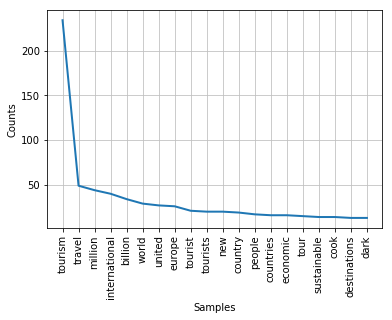

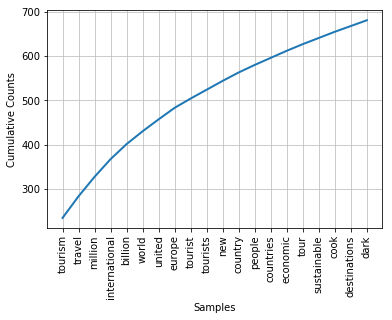

(True, True)

In [29]:
SC.plot(20), SC.plot(20, cumulative = True)

In [30]:
SC.tabulate(7)

      tourism        travel       million international       billion         world        united 
          234            49            44            40            34            29            27 


True

In [31]:
SC.to_pandas()

,TF,wTF
Term,,
activity,4,0.002089
agency,4,0.002089
america,6,0.003133
area,4,0.002089
areas,4,0.002089
arrivals,10,0.005222
art,4,0.002089
asia,11,0.005744
austria,4,0.002089


In [32]:
print("The full list of terms ::>>")
SC.list_terms()

The full list of terms ::>>


['activity',
 'agency',
 'america',
 'area',
 'areas',
 'arrivals',
 'art',
 'asia',
 'austria',
 'bangkok',
 'became',
 'become',
 'billion',
 'business',
 'century',
 'china',
 'citation',
 'cities',
 'city',
 'class',
 'common',
 'communities',
 'community',
 'companies',
 'company',
 'cook',
 'countries',
 'country',
 'creative',
 'cruise',
 'cultural',
 'culture',
 'cultures',
 'dark',
 'day',
 'defined',
 'definition',
 'destination',
 'destinations',
 'developed',
 'development',
 'different',
 'dubai',
 'early',
 'ecological',
 'economic',
 'ecotourism',
 'educational',
 'emerging',
 'environment',
 'especially',
 'established',
 'europe',
 'european',
 'even',
 'example',
 'examples',
 'excursion',
 'excursions',
 'expenditure',
 'experiences',
 'experiential',
 'following',
 'football',
 'form',
 'france',
 'general',
 'germany',
 'given',
 'global',
 'grand',
 'groups',
 'growing',
 'growth',
 'half',
 'holidays',
 'hong',
 'host',
 'hotel',
 'hotels',
 'however',
 'include'

## 5. Stemming

In [33]:
stemmer = PorterStemmer()
SC.set_stemmer(stemmer.stem)
SC.compute_stems()
SC.stems

{'activity': 'activ',
 'agency': 'agenc',
 'america': 'america',
 'area': 'area',
 'areas': 'area',
 'arrivals': 'arriv',
 'art': 'art',
 'asia': 'asia',
 'austria': 'austria',
 'bangkok': 'bangkok',
 'became': 'becam',
 'become': 'becom',
 'billion': 'billion',
 'business': 'busi',
 'century': 'centuri',
 'china': 'china',
 'citation': 'citat',
 'cities': 'citi',
 'city': 'citi',
 'class': 'class',
 'common': 'common',
 'communities': 'commun',
 'community': 'commun',
 'companies': 'compani',
 'company': 'compani',
 'cook': 'cook',
 'countries': 'countri',
 'country': 'countri',
 'creative': 'creativ',
 'cruise': 'cruis',
 'cultural': 'cultur',
 'culture': 'cultur',
 'cultures': 'cultur',
 'dark': 'dark',
 'day': 'day',
 'defined': 'defin',
 'definition': 'definit',
 'destination': 'destin',
 'destinations': 'destin',
 'developed': 'develop',
 'development': 'develop',
 'different': 'differ',
 'dubai': 'dubai',
 'early': 'earli',
 'ecological': 'ecolog',
 'economic': 'econom',
 'ecoto

In [34]:
SC.to_pandas()

,Stem,TF,wTF
Term,,,
activity,activ,4,0.002089
agency,agenc,4,0.002089
america,america,6,0.003133
area,area,4,0.002089
areas,area,4,0.002089
arrivals,arriv,10,0.005222
art,art,4,0.002089
asia,asia,11,0.005744
austria,austria,4,0.002089


## 6. Computing specificity of terms in a corpus with respect to a reference background corpus

In [35]:
help(Scoring)

Help on class Scoring in module __main__:

class Scoring(builtins.object)
 |  The object given term frequency distribution of a foreground specific corpus and a background
 |  reference corpus, provides tools that help to compute specificity of each term in the foreground corpus.
 |  
 |  This kind of scoring is mainly to be used for the cases where an input text around a specific
 |  theme or topic is given. The process expects a tokenized, cleaned text with term counts.
 |  
 |  Note:
 |      It consumes a Corpus object and uses its methods and attributed and mutates it unless desired otherwise.
 |  
 |  Attributes:
 |      sCorpus (:obj:`Corpus`): A Corpus class instance of the specific corpus to be scored.
 |      rCorpus (:obj:`Corpus`): A Corpus class instance of the reference corpus.
 |      common (:obj:`list` of `str`): The common terms between the foreground and backgrouns corpus
 |      distinct (:obj:`list` of `str`): The terms observed in the foreground but not in the back

### 6.1 Loading and preparing a reference corpus
For the demonstration purpose a NLTK's Brown corpus is used. 

However for a more sound comparison foreground corpus needs to a sample or a driven niche of the background corpus. In that respect full Wikipedia Corpus needs to be inetgrated into this work:

https://github.com/pavlobaron/wpcorpus
 

#### Loading

In [36]:
# For the first timers: uncomment the command below for an interaction download process
#nltk.download()
from nltk.corpus import brown
TOKENSREF = list(nltk.corpus.brown.words())

#### Cleaning

In [42]:
MINLENGTH = 1
MIN_FREQ = 4
def run_cleaning_process(Cleaner, tokens, exceptions = [], minL = MINLENGTH, minF = MIN_FREQ):
    TFtokens = Cleaner.clean(tokens,logging = True)
    print('Reduction due to punctuations and stopwords = {}.'.format(len(tokens) - len(TFtokens)))
   
    uTFtokens = Cleaner.remove_numerals(TFtokens, remove_any = False, exceptions = [])
    print("Reduction due to all numeral terms = {}".format(len(TFtokens) - len(uTFtokens)))
    TFtokens = uTFtokens
    
    uTFtokens = Cleaner.remove_numerals(TFtokens, remove_any = True, exceptions = [])
    print("Reduction due to partially numeral terms = {}".format(len(TFtokens) - len(uTFtokens)))
    TFtokens = uTFtokens
    
    uTFtokens = Cleaner.remove_short_terms(TFtokens, threshold = minL, exceptions = [])
    print("Reduction due to short terms = {}".format(len(TFtokens) - len(uTFtokens)))
    TFtokens = uTFtokens
    
    uTFtokens = Cleaner.remove_rare_terms(TFtokens, below = minF)
    print("Reduction due to rare terms = {}".format(len(TFtokens) - len(uTFtokens)))
    TFtokens = uTFtokens
    
    print("The total term count reduction during this cleaning process = {}".format(len(tokens) - len(TFtokens)))
    print("Percentage = {}%".format(len(tokens)/len(TFtokens)))
    return TFtokens

In [43]:
TOKENSREF_TF = run_cleaning_process(Cleaner, TOKENSREF)

Initial state:
Total term counts: 1161192
[('the', 69971),
 (',', 58334),
 ('.', 49346),
 ('of', 36412),
 ('and', 28853),
 ('to', 26158),
 ('a', 23195),
 ('in', 21337),
 ('that', 10594),
 ('is', 10109)]
Removing panctuation only terms...
Total term counts: 1013508
[('the', 69971),
 ('of', 36412),
 ('and', 28853),
 ('to', 26158),
 ('a', 23195),
 ('in', 21337),
 ('that', 10594),
 ('is', 10109),
 ('was', 9815),
 ('he', 9548)]
Removing stopwords...
Total term counts: 522926
[('will', 2245),
 ('said', 1961),
 ('new', 1635),
 ('time', 1598),
 ('two', 1412),
 ('now', 1314),
 ('man', 1207),
 ('even', 1170),
 ('made', 1125),
 ('must', 1013)]
Reduction due to punctuations and stopwords = 1111603.
Reduction due to all numeral terms = 1750
Reduction due to partially numeral terms = 535
Reduction due to short terms = 18
Reduction due to rare terms = 31165
The total term count reduction during this cleaning process = 1145071
Percentage = 72.02977482786427%


In [44]:
def corpus_summary(SC, top = 20, bottom = 20):
    print('Number of unique words = {}'.format(SC.get_count_uniques()))
    print('Number of words = {}'.format(SC.get_size()))
    print('\nMost frequents ::>>')
    pp.pprint(SC.get_top_frequents(top = top))
    print('\nLeast frequents ::>>')
    SC.get_least_frequents(bottom = bottom)
    SC.plot(top), SC.plot(top, cumulative = True)
    SC.tabulate(7)
    return SC.to_pandas()

Number of unique words = 16121
Number of words = 467519

Most frequents ::>>
[('will', 2245),
 ('said', 1961),
 ('new', 1635),
 ('time', 1598),
 ('two', 1412),
 ('now', 1314),
 ('man', 1207),
 ('even', 1170),
 ('made', 1125),
 ('must', 1013),
 ('af', 996),
 ('back', 966),
 ('years', 950),
 ('much', 937),
 ('way', 908),
 ('people', 847),
 ('mr.', 844),
 ('little', 831),
 ('state', 807),
 ('good', 806)]

Least frequents ::>>


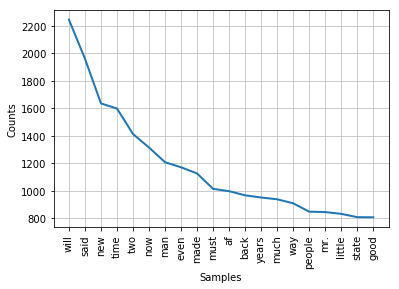

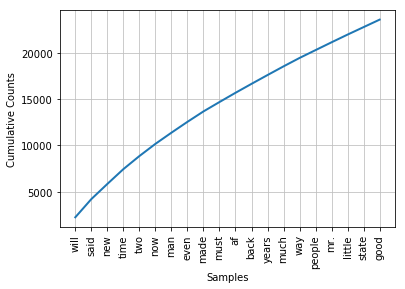

will said  new time  two  now  man 
2245 1961 1635 1598 1412 1314 1207 


In [47]:
CRef = Corpus(TOKENSREF_TF)
DF_Brown = corpus_summary(CRef)

In [48]:
DF_Brown.head(10)

,TF,wTF
Term,,
'em,41,0.000088
'im,6,0.000013
'round,5,0.000011
**ya,5,0.000011
**yc,8,0.000017
**yf,8,0.000017
**yl,6,0.000013
**yt,4,0.000009
**zg,32,0.000068


In [39]:
### 7.1 Identfying matching stems within the reference corpus. 

Note that the frequency counts are transferred accordingly.

### 1.1 Loading a reference English language corpus
#nltk.download()


common_words = SC.intersection(RC)
len(common_words)
input_specifics = SC.difference(RC)
print(len(input_specifics))
SC.labels = []
ref_terms = RC.list_terms()
labels = SC.label(lambda x: 'raw' if x in ref_terms else None)
ref_stems = RC.stems.values()
labels = SC.label(lambda x: 'stem' if SC.stemmer(x) in ref_stems else None, SC.labels)

specifics = SC.specifics
labels = SC.label(lambda x: 'om' if x in specifics else None, SC.labels)
pp.pprint({w:lab for w,lab in SC.labels.items() if lab == 'om'})
len([w for w,lab in SC.labels.items() if not lab])

SyntaxError: invalid syntax (<ipython-input-39-5c078bfae14d>, line 3)

In [ ]:
S = Scoring(SC,RC)

In [ ]:
S.get_scores_by('noref')

In [ ]:
SCored = copy.deepcopy(S.sCorpus)

In [ ]:
DF = SCored.to_pandas()

In [ ]:
type(S.distinct)

## 10. Tabulating the results and generating the output file

In [ ]:
OUTPUT_FOLDER = "./output/"
csvfile_name = OUTPUT_FOLDER + "schwartz_" + OUTPUT_FNAME_PREFIX + ".csv"
with open(csvfile_name, 'w') as csvfile:
    #thewriter = csv.writer(csvfile, delimiter=',')
    #for k,v in sorted(makerness.items(), key=lambda x:x[1][0], reverse=True): thewriter.writerow([k,v[0],v[1]])
    DF.to_csv(csvfile_name)

### 10.1 Outputfile name for the theme

In [ ]:
print(csvfile_name)

### 10.2 Selecting a specific range of scores

Note that with the function below a specific slice between a mix and max value can be determined. Besides, the filterin can be applied to any column as long as its data type is a number.


In [ ]:
min_t = 4
aslice = filter_pandas_rows(DF, min_t = min_t)
reduced = '_min{}'.format(min_t)
filtered_csvfile_name = OUTPUT_FOLDER + "schwartz_" + OUTPUT_FNAME_PREFIX + reduced + ".csv"
aslice.to_csv(filtered_csvfile_name)
print(filtered_csvfile_name)

In [ ]:
#%connect_info